<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
# 1. Exploratory data Analysis
# Dsiplay the first few rows of DataFrame
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
#dsiplay information abt DataFrame
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

In [10]:
# Summary of numerical columns
print(boston_df.shape)

(506, 14)


In [11]:
#Check for missing values
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [12]:
boston_df.duplicated().sum()

0

In [13]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, 'Distribution of Median Value Owner-Occupied Homes')

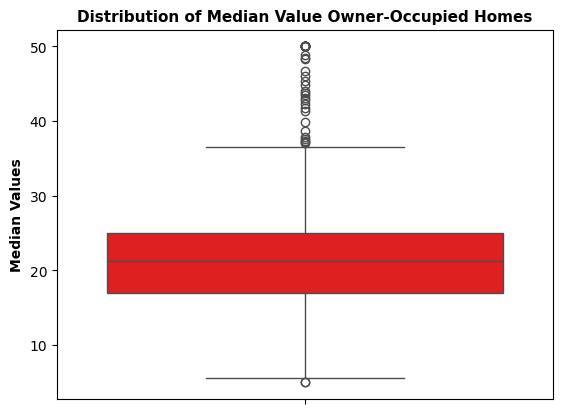

In [15]:
# 2.1 Boxplot for Median Value of Owner-Occupied Homes
plt = sns.boxplot(y='MEDV', data=boston_df, color='red')
plt.set_xlabel('',fontsize=10) 
plt.set_ylabel('Median Values',fontsize=10,weight='bold')
plt.set_title('Distribution of Median Value Owner-Occupied Homes', fontsize=11, weight='bold')

Text(0.5, 1.0, 'Frequency of Properties near Charles River')

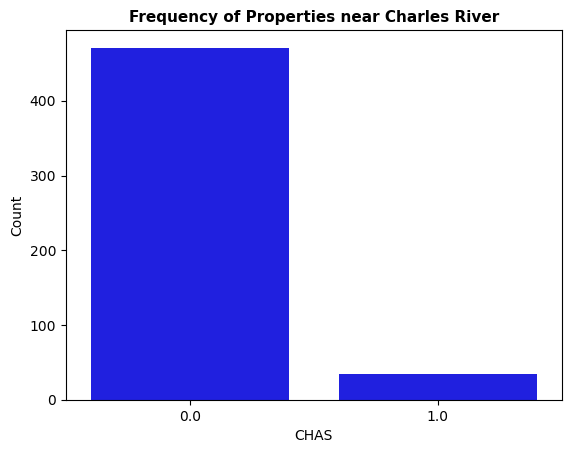

In [19]:
# 2.2 Bar Plot for Cahrles River variable
plt = sns.countplot(x='CHAS', data=boston_df, color='blue')
plt.set_xlabel('CHAS', fontsize=10)
plt.set_ylabel('Count', fontsize=10)
plt.set_title('Frequency of Properties near Charles River', fontsize=11, weight='bold')

<AxesSubplot:title={'center':'Median Home Values across different Age Group'}, xlabel='Age Group', ylabel='MEDV'>

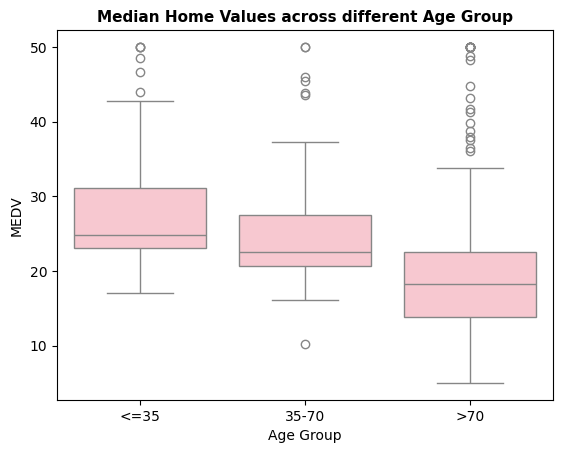

In [22]:
# 2.3 Boxplot for MEDV vs Age
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['<=35','35-70','>70'])

plt= sns.boxplot(x='age_group',y='MEDV', data=boston_df, color='pink')
plt.set_xlabel('Age Group', fontsize=10)
plt.set_ylabel('MEDV', fontsize=10)
plt.set_title('Median Home Values across different Age Group', fontsize=11, weight='bold')
plt

Text(0.5, 1.0, 'Relationship between Nitric Oxide Concentrations and Propertion of No-Retail Business Acres per Town')

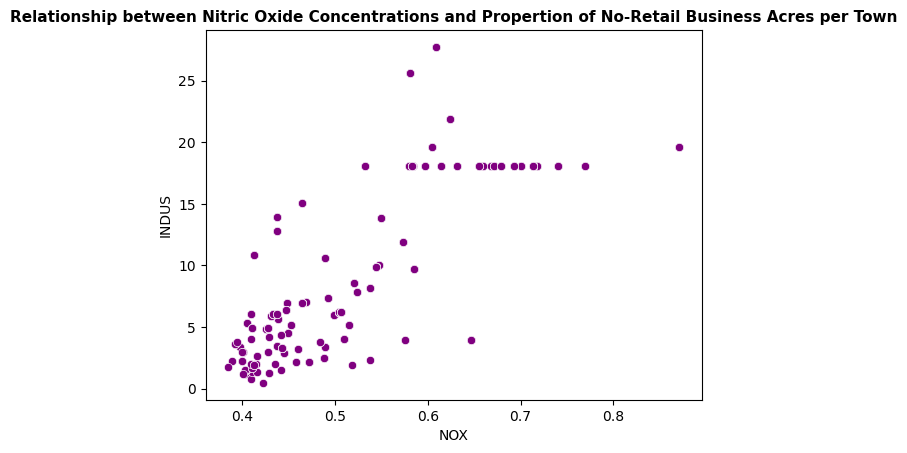

In [24]:
# 2.4 Scatterplot for Nitric Oxide Concentration vs proportion of non-retail business Acres per Town
plt = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='purple')
plt.set_xlabel('NOX', fontsize=10)
plt.set_ylabel('INDUS', fontsize=10)
plt.set_title('Relationship between Nitric Oxide Concentrations and Propertion of No-Retail Business Acres per Town', fontsize=11, weight='bold')

<AxesSubplot:xlabel='PTRATIO', ylabel='Frequency of Pupil to Teacher Ratio Values'>

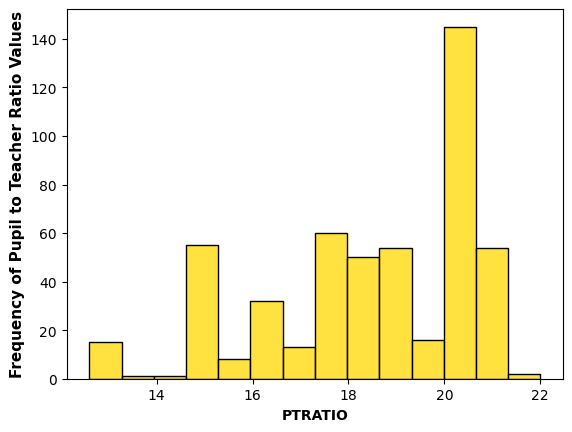

In [27]:
# 2.5 Histogram for Pupil to Teach Ratio
plt = sns.histplot(boston_df['PTRATIO'], color='gold')
plt.set_xlabel('PTRATIO', fontsize=10, weight='bold')
plt.set_ylabel('Frequency of Pupil to Teacher Ratio Values', fontsize=11, weight='bold')
plt

In [31]:
# 3 Hypothesis Testing
# 3.1 Charles River Influence on Median House Values
chas0 =boston_df[boston_df['CHAS']==0]['MEDV']
chas1 =boston_df[boston_df['CHAS']==1]['MEDV']
t_stat,p_val= scipy.stats.ttest_ind(chas0,chas1)
print(f'T-statistics : {t_stat}, P-value: {p_val}')
# as p-value is less than 0.05 ,we reject null hypothesis

T-statistics : -3.996437466090509, P-value: 7.390623170519905e-05


In [37]:
#3.2 Impact of Propertion of Pre-1940 Owner-Occuppied Units
f_stat, p_val = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='<=35']['MEDV'],
                                     boston_df[boston_df['age_group']=='35-70']['MEDV'],
                                     boston_df[boston_df['age_group']=='>70']['MEDV'])
print(f'F-statistc: {f_stat}, P-value:{p_val}')
# as p-value is less than 0.05 , we reject null hypothese

F-statistc: 36.40764999196599, P-value:1.7105011022702984e-15


In [40]:
# 3.3 Relationship between Nitrix Oxide Concentration and Business Acres
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation Coefficient:'", correlation_coefficient)
print("P_Value:", p_value);
# as p_value is less than 0.05, we reject null hypothesis

Correlation Coefficient:' 0.7636514469209192
P_Value: 7.913361061210442e-98


In [43]:
# 3.4 Weighted Distance to Employment Centres and Median Home Values
X= boston_df[['DIS']]
y= boston_df['MEDV']
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:27:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""